In [1]:
import numpy as np
import pandas as pd

# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt

from decomposeed import decompose_ed_randomly_and_using_Davenport

Text(0, 0.5, 'FWHM [d]')

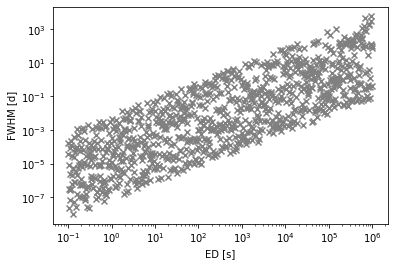

In [87]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, fwhm, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("FWHM [d]")

Text(0, 0.5, 'rel. amplitude')

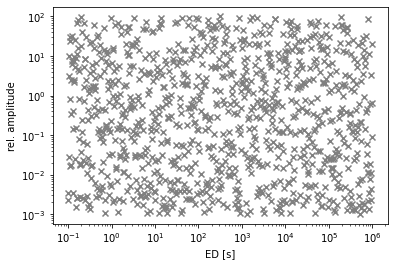

In [88]:
ed = np.logspace(-1,6,1000)
a, fwhm = decompose_ed_randomly_and_using_Davenport(ed)
plt.scatter(ed, a, marker="x", c="grey")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("rel. amplitude")

In [2]:
df = pd.read_csv("results/12_merge_2022_01_11_2022_01_10_flares_alpha_beta_rand_merged.csv")
# df = df.groupby("midlat_deg").mean()
# del df["midlat_deg"]
df.shape

(4160, 12)

In [3]:
colids = np.where([("diff" in x) for x in  df.columns.values])[0]
columns = df.columns.values[colids]
columns

array(['diff_tstart_kurtosis_stepsize1', 'diff_tstart_skew_stepsize1',
       'diff_tstart_std_over_mean_stepsize1',
       'diff_tstart_kurtosis_stepsize2', 'diff_tstart_skew_stepsize2',
       'diff_tstart_std_over_mean_stepsize2',
       'diff_tstart_kurtosis_stepsize3', 'diff_tstart_skew_stepsize3',
       'diff_tstart_std_over_mean_stepsize3'], dtype=object)

In [4]:
df = df.fillna(-999)

In [5]:
x = df[columns].values 
x.shape

(4160, 9)

In [6]:
y = df["midlat2"].values

In [7]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
  
# fit the regressor with x and y data
regressor.fit(x, y) 

RandomForestRegressor(random_state=0)

In [11]:
# read validation data
valid = pd.read_csv("results/2022_01_10_aggregate_validate.csv")
valid.head()

,midlat_deg,diff_tstart_kurtosis_stepsize1,diff_tstart_skew_stepsize1,diff_tstart_std_over_mean_stepsize1,diff_tstart_kurtosis_stepsize2,diff_tstart_skew_stepsize2,diff_tstart_std_over_mean_stepsize2,diff_tstart_kurtosis_stepsize3,diff_tstart_skew_stepsize3,diff_tstart_std_over_mean_stepsize3,midlat2
0,"(0.0, 0.13]",8.330746,2.766307,1.364980,3.335610,1.983161,1.008380,1.617883,1.622866,0.874091,0.065123
1,"(0.13, 0.26]",13.459456,3.362932,1.486119,5.200888,2.267476,1.047464,2.414385,1.679479,0.814939,0.195369
2,"(0.26, 0.391]",15.823436,3.630150,1.369251,7.571076,2.548024,0.874704,5.860838,2.315259,0.722586,0.325615
3,"(0.391, 0.521]",9.124139,2.780601,1.234914,4.685707,2.054648,0.928218,3.181965,1.728020,0.776796,0.455861
4,"(0.521, 0.651]",20.906566,4.221893,1.447911,8.539385,2.845877,1.009153,5.312935,2.379388,0.834777,0.586107


In [12]:
valid = valid.fillna(-999)

# del valid["inclination_deg"]
# del valid["nflares"]
# valid = valid.groupby("midlat_deg").mean()
# del valid["midlat_deg"]
validx = valid[columns].values 
validy = valid['midlat2'].values
validx.shape

(691, 9)

In [13]:
predictions = regressor.predict(validx)

In [14]:
errors = predictions - validy

In [23]:
dd = pd.read_csv("results/2022_01_10_flares_alpha_beta_rand.csv", names=['istart','istop','tstart','tstop',                  
                              'ed_rec','ed_rec_err','ampl_rec',
                              'dur','total_n_valid_data_points','midlat_deg',
                              'inclination_deg','n_spots','beta_1',
                              'beta_2','beta_3','alpha_1',
                              'alpha_2','alpha_3','lons_1',
                              'lons_2','lons_3','starid']
           )

<AxesSubplot:>

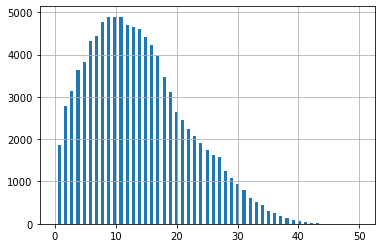

In [22]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))

<AxesSubplot:>

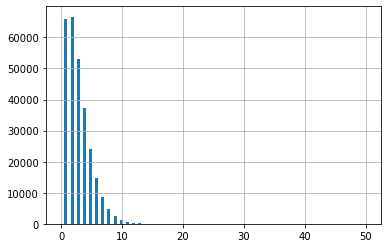

In [24]:
dd.groupby("starid").tstart.count().hist(bins=np.linspace(0,50,100))

Text(0, 0.5, 'prediction')

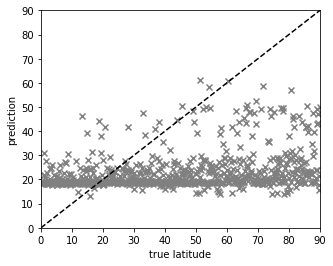

In [15]:
plt.figure(figsize=(5,4))
plt.scatter(validy, predictions, marker="x",c="grey")
plt.plot([0,90],[0,90],c="k",linestyle="dashed")
plt.xlim(0,90)
plt.ylim(0,90)
plt.xlabel("true latitude")
plt.ylabel("prediction")

In [80]:
valid.columns

Index(['midlat_deg', 'diff_tstart_kurtosis_stepsize1',
       'diff_tstart_skew_stepsize1', 'diff_tstart_std_over_mean_stepsize1',
       'diff_tstart_kurtosis_stepsize2', 'diff_tstart_skew_stepsize2',
       'diff_tstart_std_over_mean_stepsize2', 'diff_tstart_kurtosis_stepsize3',
       'diff_tstart_skew_stepsize3', 'diff_tstart_std_over_mean_stepsize3',
       'midlat2'],
      dtype='object')

In [81]:
feature_list = list(valid[columns].columns.values)

In [82]:
# Get numerical feature importances
importances = list(regressor.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: diff_tstart_std_over_mean_stepsize1 Importance: 0.31
Variable: diff_tstart_kurtosis_stepsize2 Importance: 0.14
Variable: diff_tstart_kurtosis_stepsize3 Importance: 0.11
Variable: diff_tstart_kurtosis_stepsize1 Importance: 0.09
Variable: diff_tstart_std_over_mean_stepsize2 Importance: 0.08
Variable: diff_tstart_skew_stepsize3 Importance: 0.07
Variable: diff_tstart_std_over_mean_stepsize3 Importance: 0.07
Variable: diff_tstart_skew_stepsize1 Importance: 0.06
Variable: diff_tstart_skew_stepsize2 Importance: 0.06


In [1]:
import dask